In [11]:
import pandas as pd
from collections import Counter

df = pd.read_csv("rest_cleaned_data.csv")

all_types = df['types'].dropna().apply(lambda x: x.split(', '))

flat_types = [item for sublist in all_types for item in sublist]

type_counts = Counter(flat_types)

top_10_types = type_counts.most_common(10)

top_types_df = pd.DataFrame(top_10_types, columns=['Type of Food', 'Count'])

print("Top 10 Types of Food:")
print(top_types_df)


relevant_keywords = ['restaurant', 'food', 'bar', 'cafe', 'bakery', 'pizza', 'sushi', 'vegan']


filtered_types = [t for t in flat_types if any(k in t for k in relevant_keywords)]

Top 10 Types of Food:
               Type of Food  Count
0                restaurant     54
1         point_of_interest     54
2                      food     54
3             establishment     54
4                       bar     22
5        spanish_restaurant     15
6  mediterranean_restaurant     15
7                     store      7
8        seafood_restaurant      6
9               event_venue      6


In [2]:
from collections import Counter
import pandas as pd

excluded = ['restaurant', 'food', 'bar', 'point_of_interest', 'establishment', 'store']


filtered_types = [t for t in flat_types if 'restaurant' in t and t not in excluded]


type_counts_filtered = Counter(filtered_types)
top_10_filtered = type_counts_filtered.most_common(10)


top_types_df = pd.DataFrame(top_10_filtered, columns=['Type of Restaurant', 'Count'])

print("Top 10 Specific Restaurant Types:")
print(top_types_df)

print("Last restaurant in Top 10:")
print(top_types_df.tail(1))

top_types_df.to_csv("top_10_restaurant_types.csv", index=False)

Top 10 Specific Restaurant Types:
         Type of Restaurant  Count
0        spanish_restaurant     15
1  mediterranean_restaurant     15
2        seafood_restaurant      6
3     vegetarian_restaurant      5
4      fast_food_restaurant      4
5          vegan_restaurant      4
6       american_restaurant      4
7         brunch_restaurant      4
8      hamburger_restaurant      3
9      breakfast_restaurant      3
Last restaurant in Top 10:
     Type of Restaurant  Count
9  breakfast_restaurant      3


In [12]:
import pandas as pd

df = pd.read_csv("rest_cleaned_data.csv")

top_10_reviews = df.sort_values(by="reviews", ascending=False).head(10)

top_10_reviews = top_10_reviews[["name", "reviews", "rating"]]

top_10_reviews.to_csv("top10_reviews_filtered.csv", index=False)


print(top_10_reviews)

top_10_reviews.to_csv("top_10_reviews_final.csv", index=False)

                     name  reviews  rating
30    Arenas de Barcelona  66317.0     4.2
0   El Nacional Barcelona  37535.0     4.4
29              Salamanca  29142.0     4.0
6        Colom Restaurant  26749.0     4.7
8          Hard Rock Cafè  24903.0     4.4
1     Cerveceria Catalana  22330.0     4.4
3           Ciutat Comtal  20562.0     4.4
31   El Bosc de Les Fades  16495.0     4.4
2                 Vinitus  15137.0     4.5
15               7 Portes  14185.0     4.2


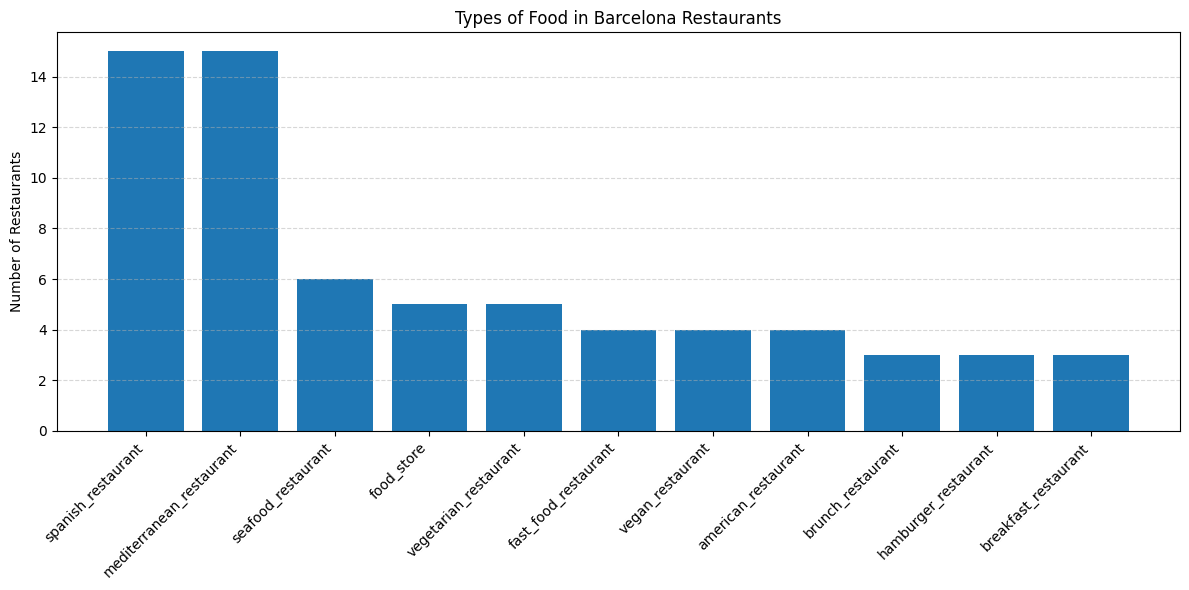

In [13]:
types = [
    "spanish_restaurant",
    "mediterranean_restaurant",
    "seafood_restaurant",
    "food_store",
    "vegetarian_restaurant",
    "fast_food_restaurant",
    "vegan_restaurant",
    "american_restaurant",
    "brunch_restaurant",
    "hamburger_restaurant",
    "breakfast_restaurant"
]

counts = [15, 15, 6, 5, 5, 4, 4, 4, 3, 3, 3]

import matplotlib.pyplot as plt

types = [
    "spanish_restaurant",
    "mediterranean_restaurant",
    "seafood_restaurant",
    "food_store",
    "vegetarian_restaurant",
    "fast_food_restaurant",
    "vegan_restaurant",
    "american_restaurant",
    "brunch_restaurant",
    "hamburger_restaurant",
    "breakfast_restaurant"
]

counts = [15, 15, 6, 5, 5, 4, 4, 4, 3, 3, 3]

plt.figure(figsize=(12, 6))
plt.bar(types, counts)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Restaurants")
plt.title("Types of Food in Barcelona Restaurants")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

plt.savefig("types_of_food_chart.png")  
plt.show()

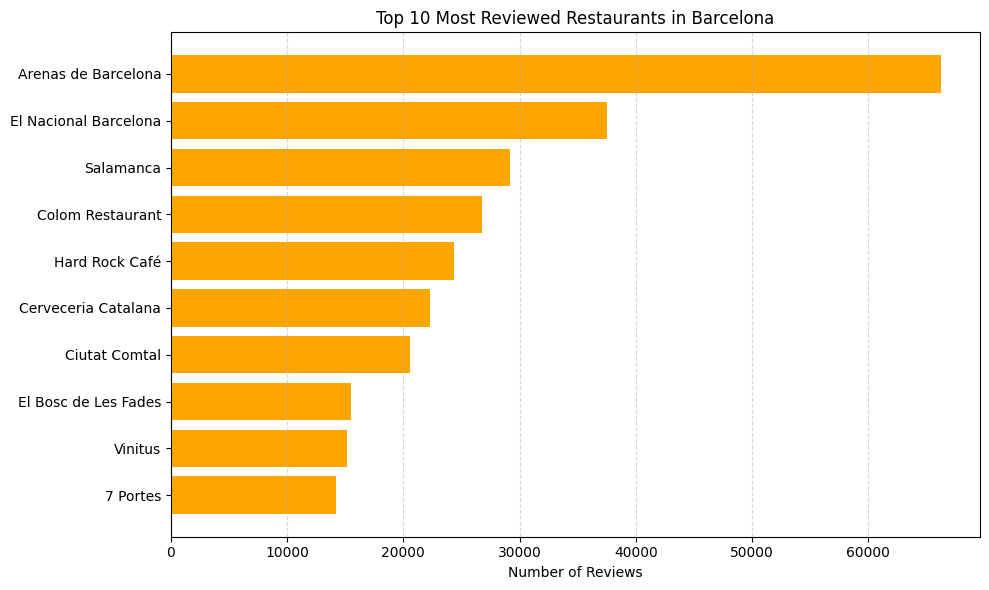

In [6]:
import matplotlib.pyplot as plt


names = [
    "Arenas de Barcelona",
    "El Nacional Barcelona",
    "Salamanca",
    "Colom Restaurant",
    "Hard Rock Café",
    "Cerveceria Catalana",
    "Ciutat Comtal",
    "El Bosc de Les Fades",
    "Vinitus",
    "7 Portes"
]

reviews = [66317, 37535, 29142, 26749, 24393, 22330, 20562, 15495, 15137, 14185]

plt.figure(figsize=(10, 6))
plt.barh(names[::-1], reviews[::-1], color='orange') 
plt.xlabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Restaurants in Barcelona")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

/var/folders/9p/vp93bjn92s7ggp8mhnv9r3nw0000gn/T/ipykernel_41242/4151310197.py:20: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9p/vp93bjn92s7ggp8mhnv9r3nw0000gn/T/ipykernel_41242/4151310197.py:22: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.savefig("top10_reviews_chart.png")
/Users/viktoria170/Desktop/Ironhack/Week4/first_project/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


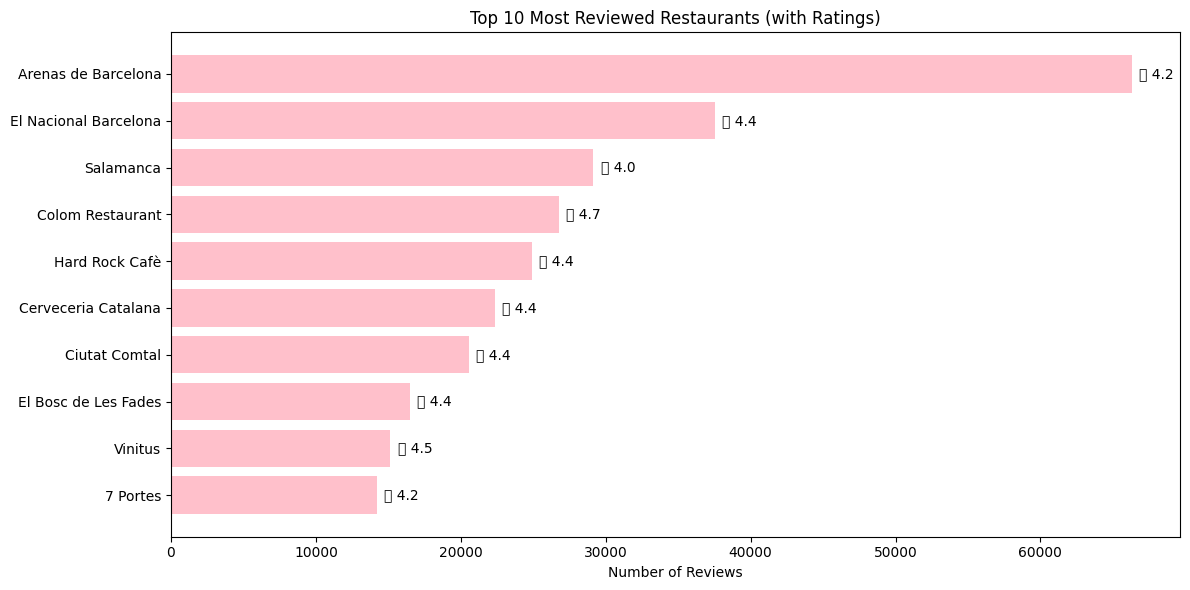

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("top_10_reviews_final.csv")

plt.figure(figsize=(12, 6))

bars = plt.barh(df["name"], df["reviews"], color='pink')

for bar, rating in zip(bars, df["rating"]):
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2, f"⭐ {rating}", va='center')

plt.xlabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Restaurants (with Ratings)")

plt.gca().invert_yaxis()

plt.tight_layout()

plt.savefig("top10_reviews_chart.png")

plt.show()